In [1]:
import glob
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import pandas as pd
from rdkit.Chem import Descriptors
import subprocess
from openbabel import pybel

IPythonConsole.drawOptions.addBondIndices = True
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.molSize = 1500,1000

from csv import writer

# Procedure for creating fragments (still need to write code)

In [2]:
SMILES_molecules = pd.read_csv('../OPEP2_dataset_SMILES.csv')

#canonical_frag_smiles = []

0


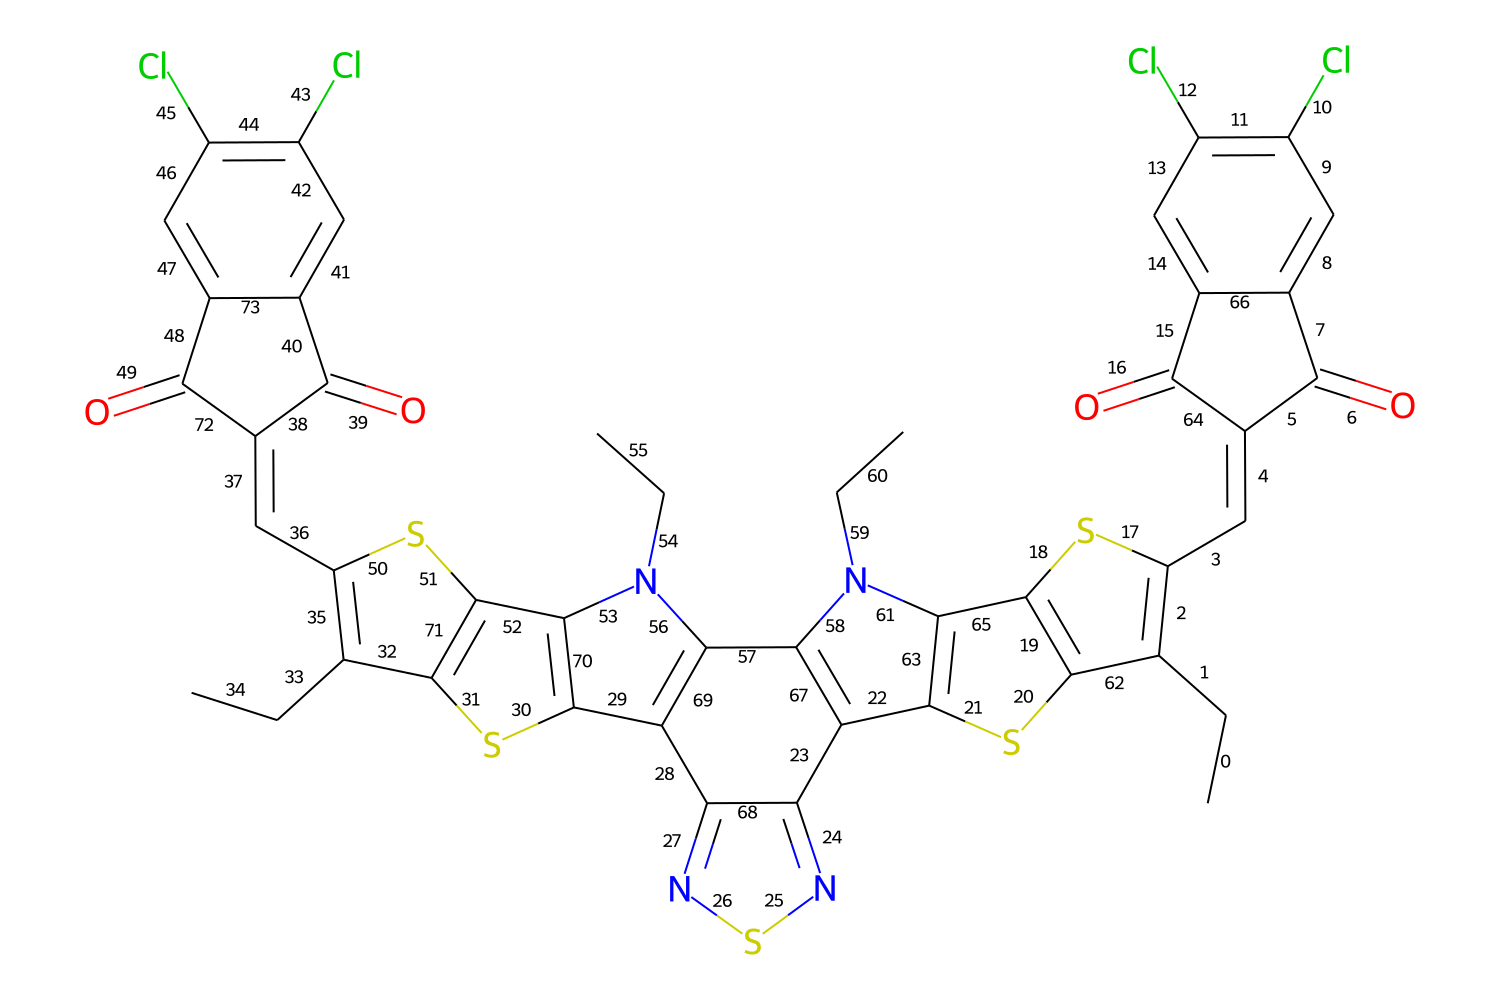

In [1136]:
# index on SMILES csv we are up to
mol_number = 817

# number for next filename
counter = 403

molecule = SMILES_molecules.iloc[mol_number][1]
smiles = SMILES_molecules.iloc[mol_number][4]
mol = Chem.MolFromSmiles(smiles)
# checks for errors by counting radical electrons (should be 0)
print(Descriptors.NumRadicalElectrons(mol))
mol

In [1134]:
# list the bonds you want to break on
bonds = [ 36, 3
        ]

fragments = Chem.FragmentOnBonds(mol, bonds, addDummies=False)
frag_smiles = Chem.MolToSmiles(fragments,False)
frag_smiles_list = frag_smiles.split('.')

for x in range(len(frag_smiles_list)):
    frags = pd.read_csv('../canonical_fragment_SMILES.csv')
    
    canonical_frag_smiles = frags['smiles'].tolist()

    # makes sure there are no duplicates
    if frag_smiles_list[x] not in canonical_frag_smiles:
        #canonical_frag_smiles.append(frag_smiles_list[x])

        mol1 = Chem.MolFromSmiles(frag_smiles_list[x])

        mol_block = Chem.MolToMolBlock(mol1)

        #Writes the MolBlock to a .mol file
        filename = str(counter) + '.mol'
        with open(filename, "w") as newfile:
            newfile.write(mol_block)
            
        counter += 1
        
        with open('../canonical_fragment_SMILES.csv', "a+") as csv:
            csv_writer = writer(csv)
            csv_writer.writerow([frag_smiles_list[x]])
        
with open('../molecules_already_fragmented.txt', "a+") as file:
    file.write(str(mol_number)+"\n")
    file.write(molecule)
    file.write("\n")

In [25]:
with open('building_blocks/canonical_fragment_SMILES.csv', "a+") as csv:
            csv_writer = writer(csv)
            csv_writer.writerow(['smiles'])

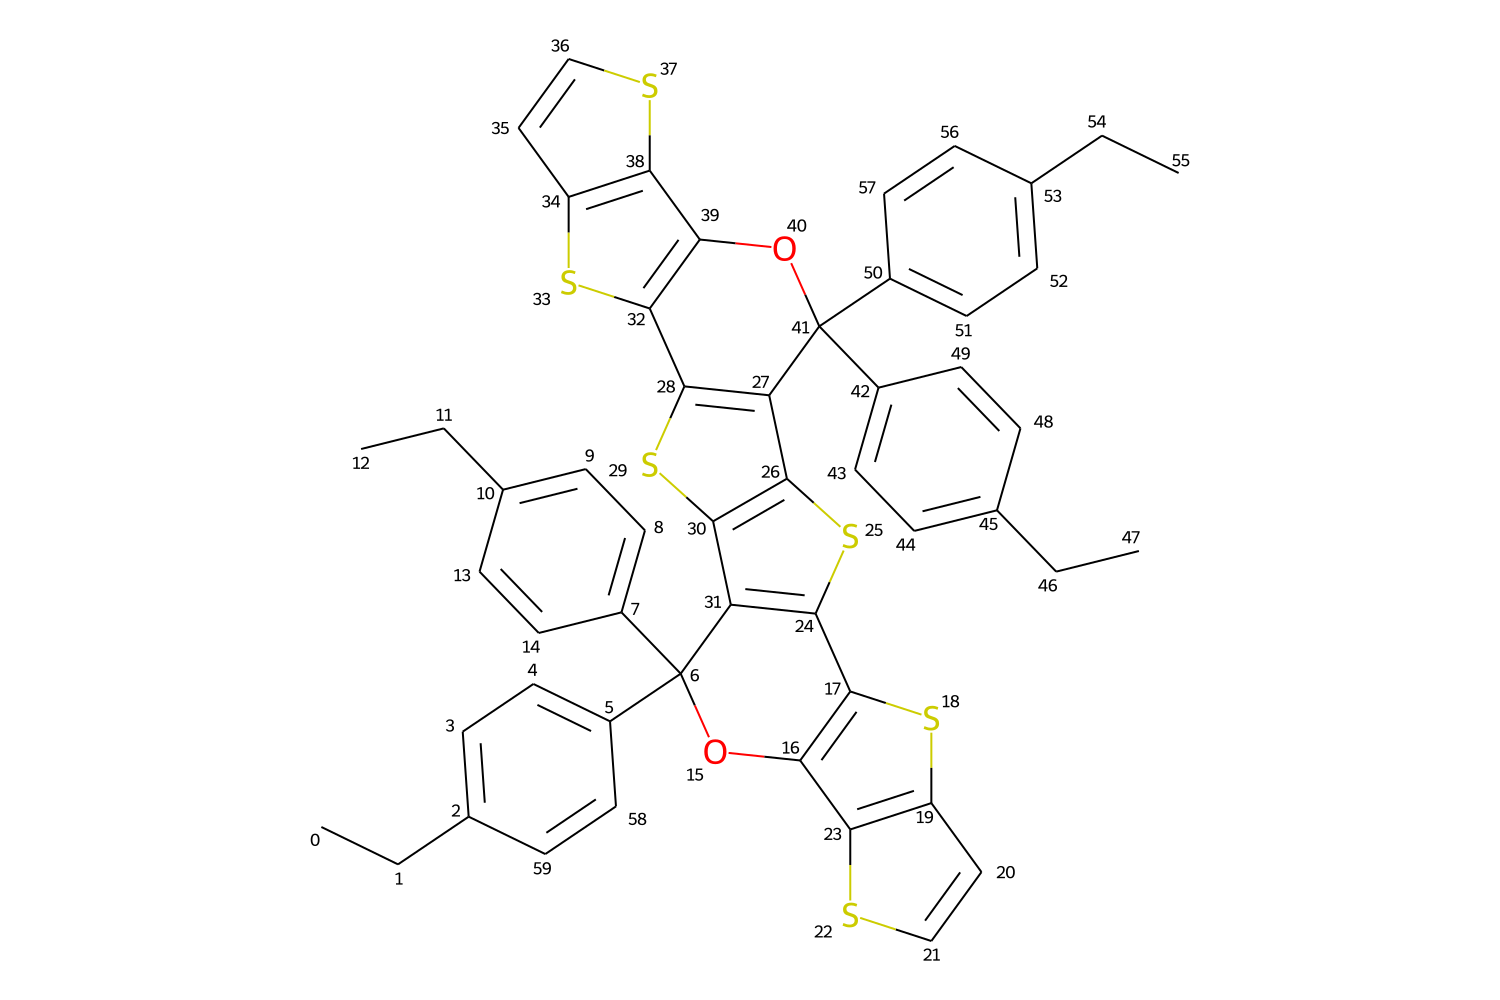

In [19]:
mol = Chem.MolFromMolFile('116.mol')
smiles = Chem.MolToSmiles(mol)
mol

In [ ]:
#obabel <filename>.sdf -O <filename>.smi -xf <starting atom index> -xl <last atom index>

## THIS WORKS! Just remember the indexing is off by 1 between rdkit and openbabel

In [18]:
#subprocess.call('(obabel %s.mol -O %s.smi -xf %d -xl %d)' %('116', '116', 37, 22), shell=True)

0